In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq
import matplotlib.animation as animation

N = 128   # number of lattice sites
a = 1     # lattice spacing
h = 1   
m = 1     # mass of the particle
x0 = -N*a/2  # starting position of the lattice

# Parameters of the wave packet
x_mean = -40
p_mean = 0.5
delta_x = 5 * a

# x grid
x = np.linspace(x0, x0 + N*a, N)

In [2]:
# TASK 1 (x_mean = 0, p_mean = 0)

In [3]:
# Initializing the wave function (x_mean = 0, p_mean = 0)
psi = (2 * np.pi * delta_x**2)**(-1/4) * np.exp(-x**2 / (4 * delta_x**2))

# Calculating second derivative analytically
psi_ddx_analytical = ((x**2 - 2 * delta_x**2) / (4 * delta_x**4)) * psi

# Enforcing boundary conditions
psi_ddx_analytical[0] = psi_ddx_analytical[-1] = 0  

In [4]:
# Defining the Fourier transform of the wave function
psi_ft = fft(psi)

# Defining the wave numbers
k = 2 * np.pi * fftfreq(N, a)

# Calculating the second derivative of psi using the spectral method
chi_ft = -k**2 * psi_ft
chi = ifft(chi_ft)

# Enforcing boundary conditions
chi[0] = chi[-1] = 0

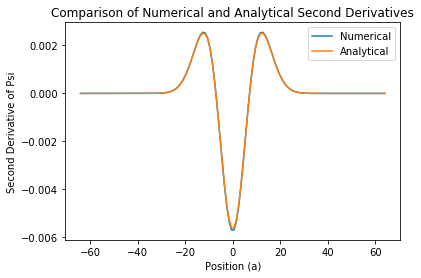

In [5]:
# Plotting the numerical and analytical second derivatives of psi
plt.plot(x, np.real(chi), label='Numerical')
plt.plot(x, np.real(psi_ddx_analytical), label='Analytical')
plt.xlabel('Position (a)')
plt.ylabel('Second Derivative of Psi')
plt.title('Comparison of Numerical and Analytical Second Derivatives')
plt.legend()

#plt.savefig("second_derivative.png")
plt.show()

In [6]:
# TASK 2

In [7]:
# Defining the parameters of the barrier potential
V0 = p_mean**2/4/m  # initial height of the barrier
x1 = -delta_x  # position of the left edge of the barrier
x2 = delta_x   # position of the right edge of the barrier

V_init = np.zeros(N) # Barrier potential set to zero

In [8]:
def f(psi, t, V):
    # Calculating the second derivative of psi using the spectral method
    psi_ft = fft(psi)
    k = 2 * np.pi * fftfreq(len(psi), h)
    d2psi_dx2 = ifft(-k**2 * psi_ft)

    # Calculating the potential energy
    Vpsi = V * psi
    
    # Calculating the time derivative of psi
    dpsi_dt = -1j/h * (-h**2/(2*m) * d2psi_dx2 + Vpsi)
    
    return dpsi_dt

In [9]:
# Creating a real-valued test function
test_func = np.random.rand(N)

# Calculating the Fourier transform of the test function
test_func_ft = fft(test_func)

# Calculating the function f applied to the test function
f_test = f(test_func_ft, 10, V_init)

# Checking that the output of f is a complex-valued array with the same shape as the input
if not isinstance(f_test, np.ndarray) or not np.iscomplexobj(f_test) or f_test.shape != test_func_ft.shape:
    print("Error: f does not return a complex-valued array with the same shape as the input")
else:
    print("f works correctly with real-valued input")

# Creating a complex-valued test function
test_func_complex = np.random.rand(N) + 1j*np.random.rand(N)

# Calculating the Fourier transform of the complex-valued test function
test_func_complex_ft = fft(test_func_complex)

# Calculating the function f applied to the complex-valued test function
f_test_complex = f(test_func_complex_ft, 0, V_init)

# Checking that the output of f is a complex-valued array with the same shape as the input
if not isinstance(f_test_complex, np.ndarray) or not np.iscomplexobj(f_test_complex) or f_test_complex.shape != test_func_complex_ft.shape:
    print("Error: f does not return a complex-valued array with the same shape as the input")
else:
    print("f works correctly with complex-valued input")

f works correctly with real-valued input
f works correctly with complex-valued input


In [10]:
# TASK 3 (x_mean = 0, p_mean != 0, no barrier potential)

In [11]:
# Time parameters for wave function with no barrier potential
dt_0 = 0.5  # Time step size
T_0 = 55.0  # Total time
n_0 = int(T_0 / dt_0)  # Number of time steps

In [12]:
# Time evolution using the 4th-order Runge-Kutta method; x_mean = p_mean = 0, no barrier potential 
psi_time = np.zeros((n_0, len(x)))
psi_time[0, :] = np.abs(psi)**2
for i in range(n_0-1):
   # Compute the time derivative at the current time step
    k1 = f(psi, i*dt_0, V_init)
    k2 = f(psi + 0.5*dt_0*k1, i*dt_0 + 0.5*dt_0, V_init)
    k3 = f(psi + 0.5*dt_0*k2, i*dt_0 + 0.5*dt_0, V_init)
    k4 = f(psi + dt_0*k3, (i+1)*dt_0, V_init)
    psi = psi + (dt_0 / 6) * (k1 + 2*k2 + 2*k3 + k4)
    psi_time[i+1] = np.abs(psi)**2

Max difference between numerical and predicted |psi(x, T)|^2: 0.0001914922020833168


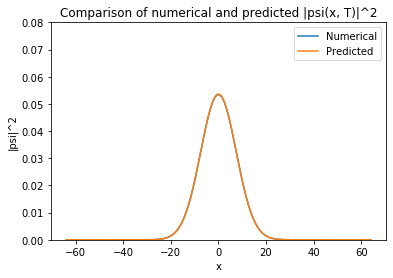

In [13]:
# Calculating the predicted wave function at time T at x_minus=0, p_minus=0
psi_pred = (2*np.pi)**(-1/4) * (delta_x + 1j*h*T_0/(2*m*delta_x))**(-1/2) * np.exp(-x**2/(4*delta_x**2 + 2j*h*T_0/m))

# Comparing |psi(x, T)|^2 with the prediction of psi(x, t) at time T
diff = np.abs(psi)**2 - np.abs(psi_pred)**2
max_diff = np.max(np.abs(diff))
print("Max difference between numerical and predicted |psi(x, T)|^2:", max_diff)

#Plotting comparison of numerical and predicted |psi(x, T)|^2
plt.plot(x, np.abs(psi)**2, label='Numerical')
plt.plot(x, np.abs(psi_pred)**2, label='Predicted')
plt.xlabel('x')
plt.ylabel('|psi|^2')
plt.ylim([0, 0.08])
plt.title('Comparison of numerical and predicted |psi(x, T)|^2')
plt.legend()

#plt.savefig("psi_comparison.png")
plt.show()

In [14]:
# Psi function with x_mean = 0, p_mean != 0, no barrier potential
psi_p = (2 * np.pi * delta_x**2)**(-1/4) * np.exp(-x**2/ (4 * delta_x**2) + 1j*p_mean*x/h)

# Time evolution using the 4th-order Runge-Kutta method; x_mean = 0, p_mean != 0, no barrier potential 
psi_p_time = np.zeros((n_0, len(x)))
psi_p_time[0, :] = np.abs(psi_p)**2

for i in range(n_0-1):
   # Compute the time derivative at the current time step
    k1 = f(psi_p, i*dt_0, V_init)
    k2 = f(psi_p + 0.5*dt_0*k1, i*dt_0 + 0.5*dt_0, V_init)
    k3 = f(psi_p + 0.5*dt_0*k2, i*dt_0 + 0.5*dt_0, V_init)
    k4 = f(psi_p + dt_0*k3, (i+1)*dt_0, V_init)
    psi_p = psi_p + (dt_0 / 6) * (k1 + 2*k2 + 2*k3 + k4)
    psi_p_time[i+1] = np.abs(psi_p)**2

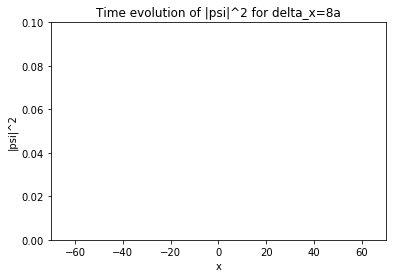

In [15]:
# Time evolutio of wave function x_mean = 0, p_mean != 0, no barrier potential
fig = plt.figure()
ax = plt.axes(xlim=(-70, 70), ylim=(0.0, 0.10))
ax.set_xlabel('x')
ax.set_ylabel('|psi|^2')
ax.set_title('Time evolution of |psi|^2 for delta_x=8a')
line, = ax.plot([], [], lw = 3)
def Init():
    line.set_data([],[])
    return line,
def animate(i):
    line.set_data(x, psi_p_time[i, :])
    return line,
ani = animation.FuncAnimation(fig, animate, init_func = Init, frames=n_0, interval = 20, blit=True)
writergif = animation.PillowWriter(fps=60) 
#ani.save('psi_deltax_8a_evolution.gif', writer = writergif)

In [16]:
# TASK 4 (x_mean != 0, p_mean !=0, barrier potential)

In [17]:
# Time parameters for wave function with no barrier potential
dt = 0.5  # Time step size
T = 200.0  # Total time
n = int(T / dt)  # Number of time steps

In [18]:
# Calculating barrier potential values
def smoothstep(x, edge0, edge1, V_max):
    def clamp(x, lowerlimit = 0.0, upperlimit = 1.0):
        if(x<lowerlimit):
            return lowerlimit
        if(x>upperlimit):
            return lowerlimit
        else:
            return upperlimit
        return x
    x = clamp((x-edge0)/(edge1-edge0))
    return V_max*x


In [19]:
# Runge-Kutta function for psi with barrier potential
def RK(psi, V):
    psi_time = np.zeros((n, len(x)))
    psi_time[0, :] = np.abs(psi)**2
    for i in range(n-1):
        k1 = f(psi, i*dt, V)
        k2 = f(psi + 0.5*dt*k1, i*dt + 0.5*dt, V)
        k3 = f(psi + 0.5*dt*k2, i*dt + 0.5*dt, V)
        k4 = f(psi + dt*k3, (i+1)*dt, V)
        psi = psi + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
        psi_time[i+1] = np.abs(psi)**2
    return psi_time;

In [20]:
# Time evolution of wave packet with barrier potential - animation
def time_evolution(psi_time, V, V_max, name):
    fig = plt.figure()
    if (V_max>0.08):
        ax = plt.axes(xlim=(-70, 70), ylim=(0.0, V_max+0.05))
    else:
        ax = plt.axes(xlim=(-70, 70), ylim=(0.0, 0.1))
    ax.set_xlabel('x')
    ax.set_ylabel('|psi|^2')
    ax.set_title('Time evolution of |psi|^2')
    line1, = ax.plot([], [], lw = 3)
    line2, = ax.plot([], [], lw = 3)
    def Init2():
        line1.set_data([],[])
        line2.set_data([],[])
        return line1, line2,
    def animate2(i):
        line1.set_data(x, psi_time[i, :])
        line2.set_data(x, V)
        return line1, line2,
    ani = animation.FuncAnimation(fig, animate2, init_func = Init2, frames=n, interval = 20, blit=True)
    writergif = animation.PillowWriter(fps=90) 
    ani.save(name , writer = writergif)  

In [21]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential
psi_px = (2 * np.pi * delta_x**2)**(-1/4) * np.exp(-(x-x_mean)**2 / (4 * delta_x**2) + 1j*p_mean*x/h)

# Calculating barrier potential
V = np.zeros(len(x))
for i in range(len(x)):
    V[i] = smoothstep(x[i], x1, x2, V0)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_time = np.zeros((n, len(x)))
psi_px_time = RK(psi_px, V)

#time_evolution(psi_px_time, V, V0, 'V1_wave_packet.gif')

In [22]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential V_max = V0*10
# Calculating barrier potential
V_higher = np.zeros(len(x))
for i in range(len(x)):
    V_higher[i] = smoothstep(x[i], x1, x2, V0*10)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_higher_time = np.zeros((n, len(x)))
psi_px_higher_time = RK(psi_px, V_higher)

#time_evolution(psi_px_higher_time, V_higher, V0*10, 'Vhigher_wave_packet.gif')

In [23]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential V_max = V0/10
# Calculating barrier potential
V_lower = np.zeros(len(x))
for i in range(len(x)):
    V_lower[i] = smoothstep(x[i], x1, x2, V0/10)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_lower_time = np.zeros((n, len(x)))
psi_px_lower_time = RK(psi_px, V_lower)

#time_evolution(psi_px_lower_time, V_lower, V0/10, 'Vlower_wave_packet.gif')

In [24]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential L = 5*delta_x
# Calculating barrier potential
V_wider = np.zeros(len(x))
for i in range(len(x)):
    V_wider[i] = smoothstep(x[i], -5*delta_x/2, 5*delta_x/2, V0)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_wider_time = np.zeros((n, len(x)))
psi_px_wider_time = RK(psi_px, V_wider)

#time_evolution(psi_px_wider_time, V_wider, V0, 'Vwider_wave_packet.gif')

In [25]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential L = 0.5*delta_x
# Calculating barrier potential
V_narrower = np.zeros(len(x))
for i in range(len(x)):
    V_narrower[i] = smoothstep(x[i], -0.5*delta_x/2, 0.5*delta_x/2, V0)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_narrower_time = np.zeros((n, len(x)))
psi_px_narrower_time = RK(psi_px, V_narrower)

#time_evolution(psi_px_narrower_time, V_narrower, V0, 'Vnarrower_wave_packet.gif')

In [26]:
# Psi function with x_mean != 0, p_mean != 0 with barrier potential L = 0.9*a
# Calculating barrier potential
V_a = np.zeros(len(x))
for i in range(len(x)):
    V_a[i] = smoothstep(x[i], -0.9*a/2, 0.9*a/2, V0)
    
# Time evolution using the 4th-order Runge-Kutta method; x_mean != 0, p_mean != 0, with barrier potential
psi_px_a_time = np.zeros((n, len(x)))
psi_px_a_time = RK(psi_px, V_a)

#time_evolution(psi_px_a_time, V_a, V0, 'Va_wave_packet.gif')